In [311]:
import pandas as pd
pd.options.display.max_columns = 90
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import math

from pprint import pprint

In [312]:
df = pd.read_csv('data/AmesHousing.txt', sep='\t', index_col=0)
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 1. Data cleansing

### Заполнение пропущенных значений

In [313]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of objects: {}'.format(df.shape[0]))
print()

def get_nan_features(df):
    nan_features = {}
    for feature in list(df):
        nans = df[feature].isna().sum()
        if (nans > 0):
            nan_features[feature] = nans
    return nan_features

nan_features = get_nan_features(df)
print('Total {} features with nan values'.format(len(nan_features)))
pprint(nan_features)

Number of features: 81
Number of objects: 2930

Total 27 features with nan values
{'Alley': 2732,
 'Bsmt Cond': 80,
 'Bsmt Exposure': 83,
 'Bsmt Full Bath': 2,
 'Bsmt Half Bath': 2,
 'Bsmt Qual': 80,
 'Bsmt Unf SF': 1,
 'BsmtFin SF 1': 1,
 'BsmtFin SF 2': 1,
 'BsmtFin Type 1': 80,
 'BsmtFin Type 2': 81,
 'Electrical': 1,
 'Fence': 2358,
 'Fireplace Qu': 1422,
 'Garage Area': 1,
 'Garage Cars': 1,
 'Garage Cond': 159,
 'Garage Finish': 159,
 'Garage Qual': 159,
 'Garage Type': 157,
 'Garage Yr Blt': 159,
 'Lot Frontage': 490,
 'Mas Vnr Area': 23,
 'Mas Vnr Type': 23,
 'Misc Feature': 2824,
 'Pool QC': 2917,
 'Total Bsmt SF': 1}


Видно, что признаки ***Alley, Fence, Misc Feature, Pool QC, Fireplace Qu*** имеют огромное число пропусков (почти все значения пропущенные). Также признак ***PID*** вряд ли содержит какую-то информацию. Поэтому имеет смысл их удалить из рассмотрения.

In [314]:
df.drop(columns=['Alley', 'Fence', 'Misc Feature', 'Pool QC', 'Fireplace Qu', 'PID'], inplace=True)

Получим списки категориальных и вещественный признаков.

In [315]:
real_features = []
cat_features = []

for feature in list(df.drop(columns=['SalePrice'])):
    if (df[feature].dtype == 'object') or (len(df[feature].unique()) <= 20):
        cat_features.append(feature)
    else:
        real_features.append(feature)

print('Число категориальных признаков: {}'.format(len(cat_features)))
print(*cat_features, sep=', ')
print()
print('Число вещественных признаков: {}'.format(len(real_features)))
print(*real_features, sep=', ')

Число категориальных признаков: 53
MS SubClass, MS Zoning, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2, Heating, Heating QC, Central Air, Electrical, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Garage Type, Garage Finish, Garage Cars, Garage Qual, Garage Cond, Paved Drive, Pool Area, Mo Sold, Yr Sold, Sale Type, Sale Condition

Число вещественных признаков: 21
Lot Frontage, Lot Area, Year Built, Year Remod/Add, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Garage Yr Blt, Garage Area, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch

Пропуски в вещественных признаках заполним средними. Пропуски в категориальных признаках заполним тегом *unk* или медианным значением в зависимости от типов данных, используемых для описания примеров в конкретном признаке.

In [316]:
for feature in real_features:
    df[feature].fillna(df[feature].mean(), inplace=True)
    
for feature in cat_features:
    if (df[feature].dtype == 'object'):
        df[feature].fillna('unk', inplace=True)
    else:
        df[feature].fillna(df[feature].median(), inplace=True)

Удостоверимся, что не осталось nan значений

In [317]:
sum(df.isna().sum())

0

### Анализ выбросов

Рассмотрим на распределение цены на недвижимость.

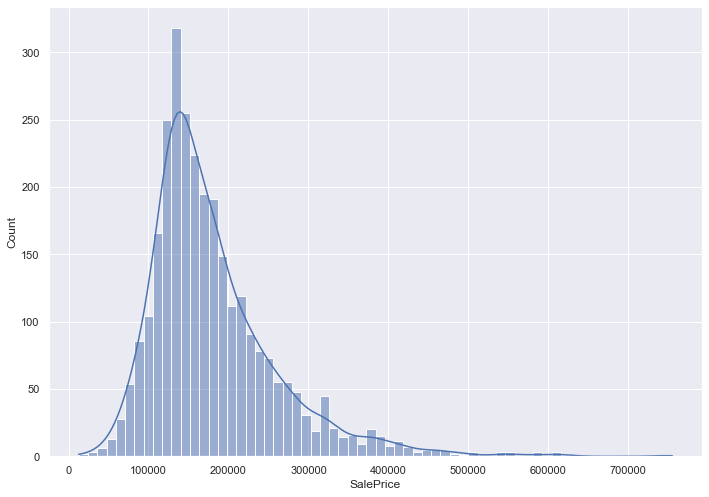

In [318]:
sns.histplot(df['SalePrice'], kde=True, color='b');

In [319]:
mean = df['SalePrice'].mean()
std = df['SalePrice'].std()

print('Mean of sale price = {}'.format(round(mean, 2)))
print('Var of sale price = {}'.format(round(std, 2)))

Mean of sale price = 180796.06
Var of sale price = 79886.69


Исходя из построенной гистограммы, можно отметить тяжелый правый хвост распределения цены на недвижимость. Имеет смысл удалить записи с суммой продажи больше 500k.

In [320]:
df = df[df['SalePrice'] < 5e5]
print(df.shape)

(2912, 75)


Mean of sale price = 178306.34
Var of sale price = 73358.63


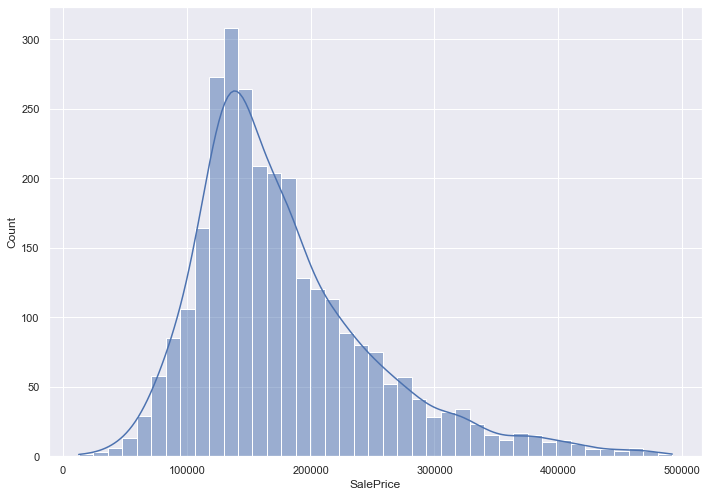

In [321]:
sns.histplot(df['SalePrice'], kde=True, color='b');
print('Mean of sale price = {}'.format(round(df['SalePrice'].mean(), 2)))
print('Var of sale price = {}'.format(round(df['SalePrice'].std(), 2)))

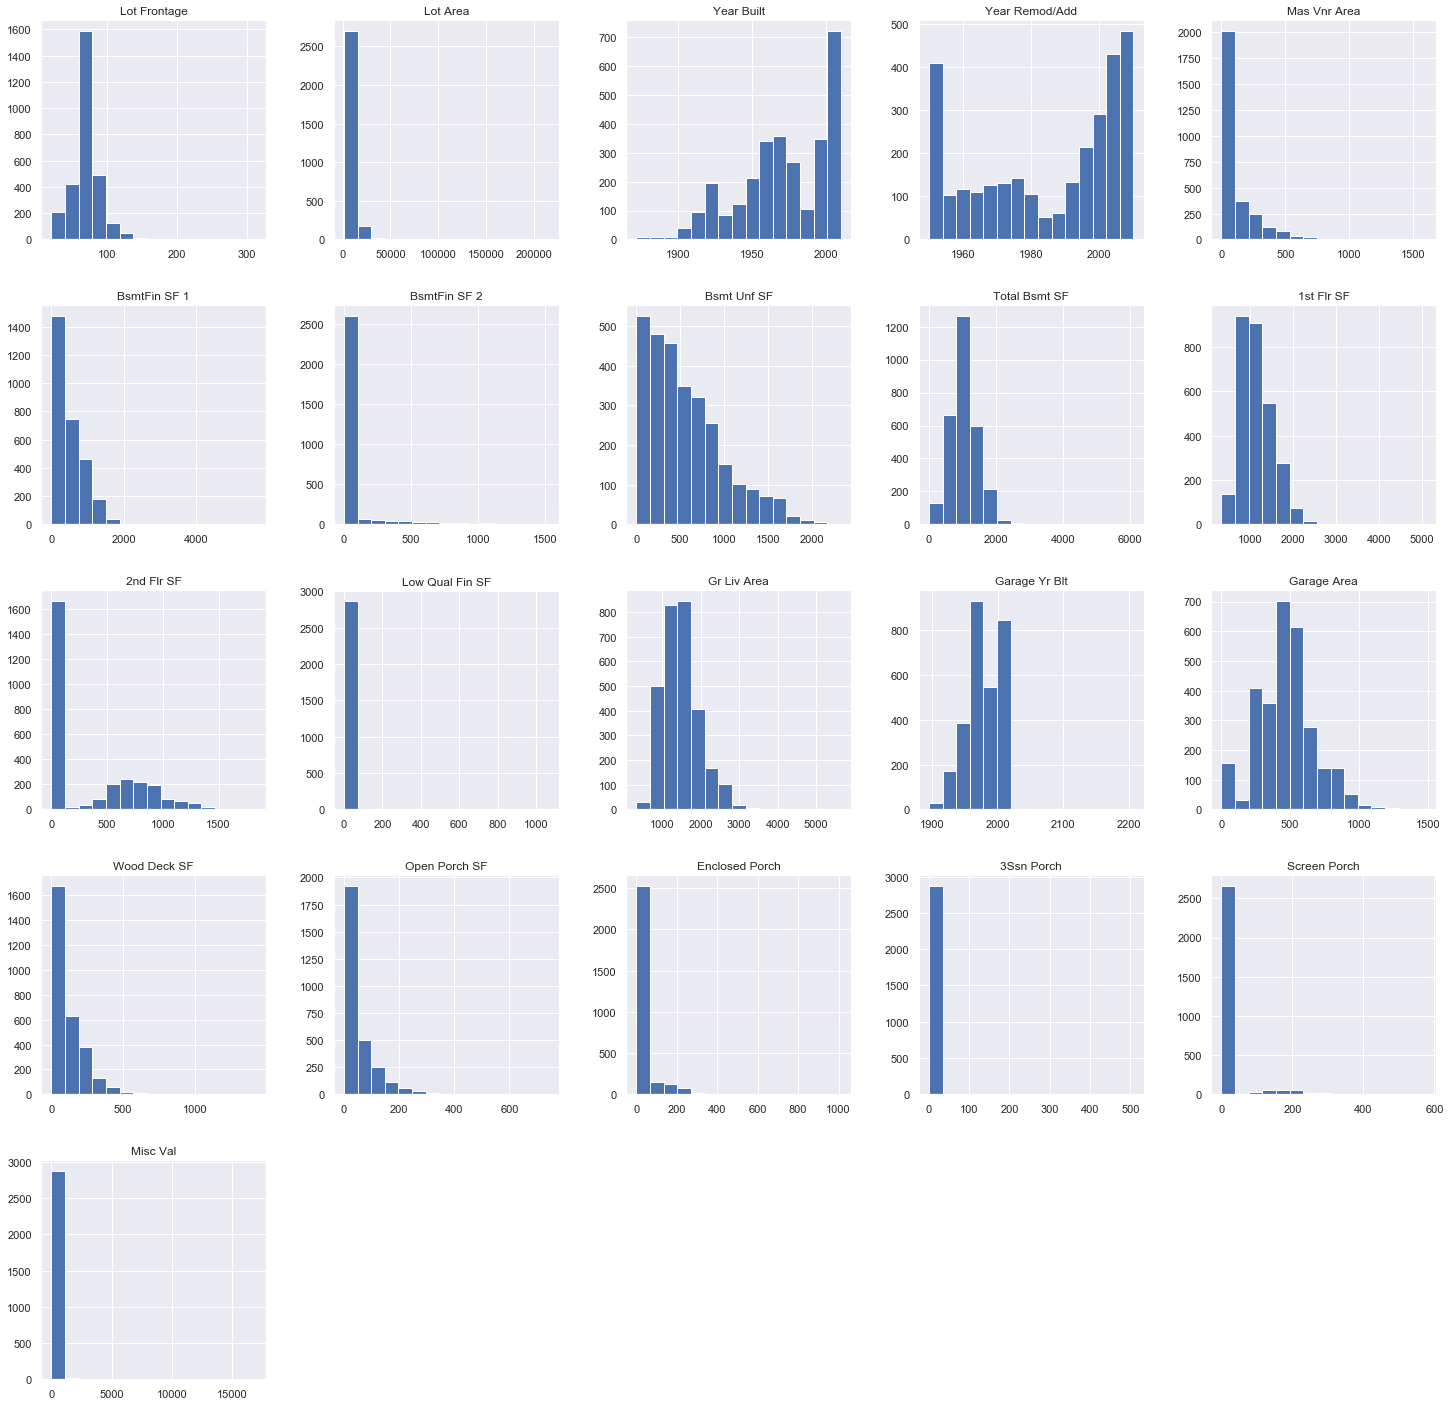

In [322]:
df[real_features].hist(bins=15, figsize=(25, 25));

[39384, 40094, 41600, 43500, 45600, 46589, 47007, 47280, 50102, 50271, 53107, 53227, 56600, 57200, 63887, 70761, 115149, 159000, 164660, 215245]


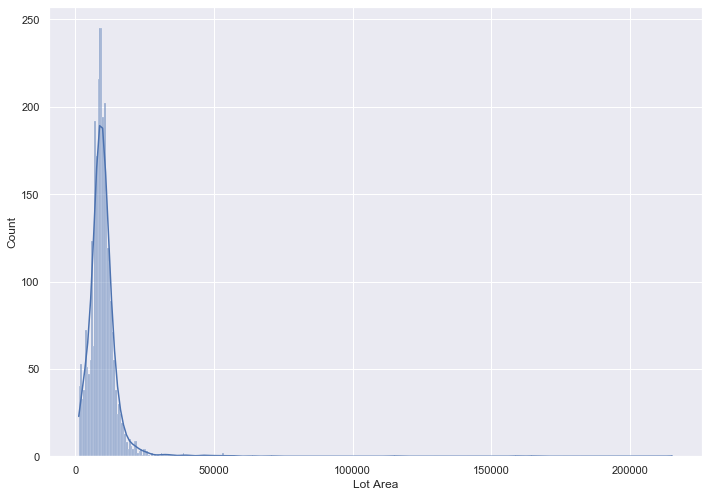

In [323]:
sns.histplot(df['Lot Area'], kde=True, color='b');
un = df['Lot Area'].unique()
print(sorted(un)[-20:])

In [324]:
df[df['Lot Area'] > 1e5].describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.0,4.000000,4.000000,4.00,4.0,4.0,4.000000,4.0,4.000000,4.0,4.000000,4.0,4.000000,4.000000,4.000000,4.0,4.0,4.0,4.0,4.000000,4.0,4.000000,4.000000
mean,70.000000,89.418443,163513.500000,6.250000,5.750000,1964.750000,1984.500000,205.750000,1100.250000,241.750000,338.500000,1680.500000,1730.750000,216.75000,0.0,1947.500000,1.250000,0.25,2.0,0.0,3.000000,1.0,6.750000,2.0,1964.750000,2.0,542.500000,262.500000,36.500000,0.0,0.0,0.0,0.0,300.000000,6.5,2007.750000,295737.500000
std,81.240384,40.387705,40975.436125,0.957427,0.957427,5.315073,22.575798,242.660771,269.113824,391.678759,314.359136,315.045499,255.986165,331.64577,0.0,171.054572,0.957427,0.50,0.0,0.0,0.816497,0.0,1.258306,0.0,5.315073,0.0,145.174608,325.409998,46.829478,0.0,0.0,0.0,0.0,355.902608,1.0,0.957427,60919.145526
min,20.000000,69.224590,115149.000000,5.000000,5.000000,1958.000000,1965.000000,0.000000,697.000000,0.000000,80.000000,1444.000000,1444.000000,0.00000,0.0,1786.000000,0.000000,0.00,2.0,0.0,2.000000,1.0,5.000000,2.0,1958.000000,2.0,389.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,6.0,2007.000000,228950.000000
25%,20.000000,69.224590,148037.250000,5.750000,5.000000,1963.250000,1965.000000,0.000000,1088.500000,0.000000,97.250000,1485.250000,1575.250000,0.00000,0.0,1814.500000,0.750000,0.00,2.0,0.0,2.750000,1.0,6.500000,2.0,1963.250000,2.0,482.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,6.0,2007.000000,264987.500000
50%,35.000000,69.224590,161830.000000,6.500000,5.500000,1965.000000,1983.500000,175.500000,1227.500000,73.500000,263.500000,1571.000000,1721.500000,83.50000,0.0,1930.000000,1.500000,0.00,2.0,0.0,3.000000,1.0,7.000000,2.0,1965.000000,2.0,521.000000,190.000000,24.000000,0.0,0.0,0.0,0.0,250.000000,6.0,2007.500000,289500.000000
75%,85.000000,89.418443,177306.250000,7.000000,6.250000,1966.500000,2003.000000,381.250000,1239.250000,315.250000,504.750000,1766.250000,1877.000000,300.25000,0.0,2063.000000,2.000000,0.25,2.0,0.0,3.250000,1.0,7.250000,2.0,1966.500000,2.0,581.500000,452.500000,60.500000,0.0,0.0,0.0,0.0,550.000000,6.5,2008.250000,320250.000000
max,190.000000,150.000000,215245.000000,7.000000,7.000000,1971.000000,2006.000000,472.000000,1249.000000,820.000000,747.000000,2136.000000,2036.000000,700.00000,0.0,2144.000000,2.000000,1.00,2.0,0.0,4.000000,1.0,8.000000,2.0,1971.000000,2.0,739.000000,670.000000,98.000000,0.0,0.0,0.0,0.0,700.000000,8.0,2009.000000,375000.000000


Как можно заметить, признак ***Lot Area*** содержит несколько экстремальных значений. Удалим их.

In [325]:
df = df[df['Lot Area'] < 100000]
print(df.shape)

(2908, 75)


[750, 800, 900, 1000, 1150, 1200, 1300, 1400, 1500, 1512, 2000, 2500, 3000, 3500, 4500, 6500, 8300, 12500, 15500, 17000]


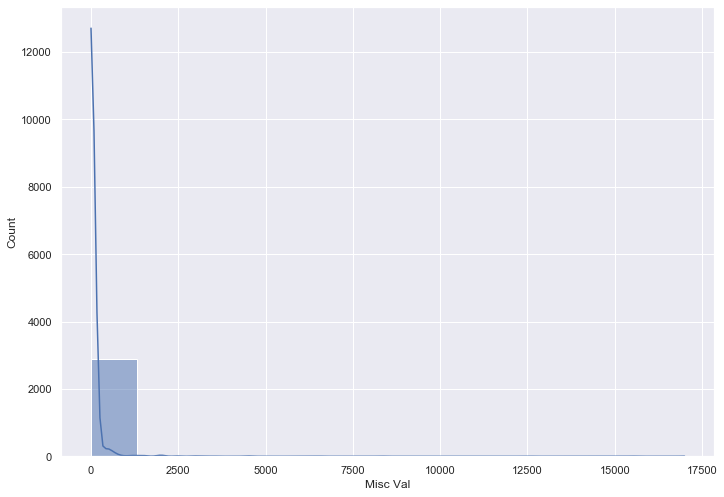

In [326]:
sns.histplot(df['Misc Val'], kde=True, color='b');
un = df['Misc Val'].unique()
print(sorted(un)[-20:])

In [327]:
df[df['Misc Val'] > 5000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
1263,20,RL,76.00000,11355,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,7,1958,2001,Gable,Tar&Grv,HdBoard,HdBoard,BrkFace,125.0,TA,TA,CBlock,TA,TA,No,BLQ,637.0,Unf,0.0,675.0,1312.0,GasA,Ex,Y,SBrkr,1312,0,0,1312,0.0,0.0,1,1,3,1,TA,6,Typ,1,Attchd,1958.0,RFn,2.0,495.0,TA,TA,Y,0,304,144,0,0,0,6500,4,2008,WD,Normal,186000
1862,90,RL,69.22459,18890,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,8300,8,2007,WD,Normal,190000
1882,20,RL,69.22459,12772,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1960,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498.0,Unf,0.0,460.0,958.0,GasA,TA,Y,SBrkr,958,0,0,958,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1960.0,RFn,1.0,301.0,TA,TA,Y,0,0,0,0,0,0,15500,4,2007,WD,Normal,151500
2181,20,RL,128.00000,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,Partial,183850


In [328]:
df = df[df['Misc Val'] < 5000]
print(df.shape)

(2903, 75)


## 2. EDA

### Корреляционный анализ

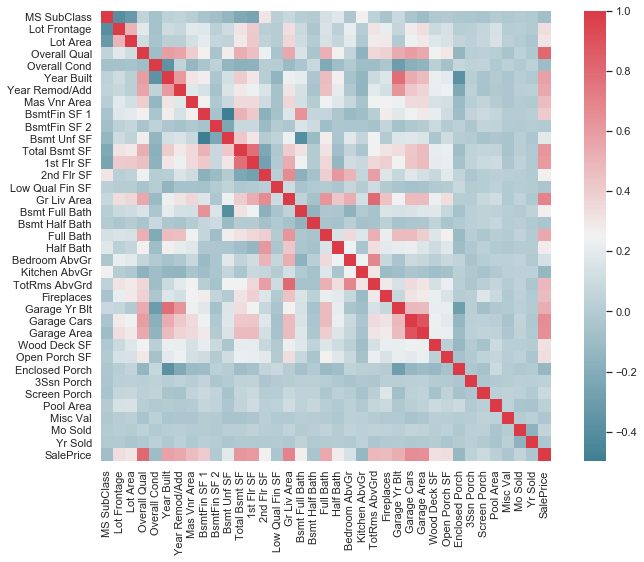

In [329]:
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True);

In [332]:
corr_map = df.corr().apply(lambda x: round(x, 2))
corr_map

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
MS SubClass,1.00,-0.39,-0.32,0.05,-0.07,0.04,0.05,0.02,-0.05,-0.07,-0.13,-0.22,-0.25,0.31,0.03,0.08,0.02,-0.00,0.14,0.18,-0.02,0.26,0.04,-0.05,0.09,-0.04,-0.10,-0.02,-0.01,-0.02,-0.04,-0.05,-0.00,-0.02,-0.00,-0.02,-0.08
Lot Frontage,-0.39,1.00,0.51,0.18,-0.06,0.11,0.08,0.19,0.18,0.03,0.11,0.31,0.41,0.02,0.01,0.34,0.09,-0.03,0.16,0.03,0.22,0.01,0.31,0.22,0.06,0.28,0.33,0.10,0.14,0.02,0.03,0.07,0.14,0.01,0.01,-0.01,0.33
Lot Area,-0.32,0.51,1.00,0.11,-0.05,0.03,0.03,0.12,0.20,0.06,0.05,0.29,0.42,0.04,0.01,0.36,0.11,0.00,0.14,0.07,0.19,-0.02,0.28,0.29,-0.01,0.24,0.29,0.17,0.15,0.05,0.03,0.07,0.15,0.02,0.00,-0.04,0.31
Overall Qual,0.05,0.18,0.11,1.00,-0.09,0.59,0.57,0.40,0.26,-0.05,0.27,0.53,0.46,0.24,-0.05,0.56,0.16,-0.05,0.52,0.26,0.06,-0.16,0.36,0.38,0.54,0.59,0.55,0.25,0.29,-0.14,0.02,0.03,0.01,-0.05,0.04,-0.02,0.81
Overall Cond,-0.07,-0.06,-0.05,-0.09,1.00,-0.37,0.05,-0.13,-0.05,0.04,-0.14,-0.17,-0.15,0.01,0.01,-0.11,-0.04,0.08,-0.21,-0.09,-0.01,-0.09,-0.08,-0.03,-0.30,-0.18,-0.15,0.02,-0.07,0.07,0.04,0.05,-0.01,0.03,-0.01,0.03,-0.10
Year Built,0.04,0.11,0.03,0.59,-0.37,1.00,0.61,0.31,0.27,-0.03,0.13,0.41,0.30,0.01,-0.14,0.23,0.21,-0.03,0.47,0.27,-0.06,-0.14,0.10,0.16,0.79,0.53,0.47,0.23,0.20,-0.37,0.02,-0.05,-0.00,-0.04,0.02,-0.01,0.58
Year Remod/Add,0.05,0.08,0.03,0.57,0.05,0.61,1.00,0.18,0.14,-0.06,0.16,0.29,0.23,0.16,-0.06,0.31,0.13,-0.05,0.46,0.21,-0.02,-0.14,0.19,0.13,0.63,0.42,0.37,0.22,0.24,-0.22,0.04,-0.05,-0.02,-0.03,0.02,0.03,0.55
Mas Vnr Area,0.02,0.19,0.12,0.40,-0.13,0.31,0.18,1.00,0.26,-0.02,0.08,0.35,0.35,0.11,-0.06,0.36,0.13,0.00,0.24,0.18,0.08,-0.05,0.25,0.26,0.24,0.34,0.35,0.14,0.13,-0.11,0.02,0.05,0.00,-0.03,0.01,-0.02,0.47
BsmtFin SF 1,-0.05,0.18,0.20,0.26,-0.05,0.27,0.14,0.26,1.00,-0.06,-0.50,0.51,0.42,-0.17,-0.07,0.17,0.64,0.07,0.07,-0.02,-0.11,-0.09,0.01,0.28,0.18,0.24,0.29,0.21,0.11,-0.10,0.05,0.09,0.07,0.00,0.00,0.02,0.41
BsmtFin SF 2,-0.07,0.03,0.06,-0.05,0.04,-0.03,-0.06,-0.02,-0.06,1.00,-0.24,0.09,0.08,-0.11,-0.00,-0.03,0.16,0.10,-0.09,-0.03,-0.04,-0.04,-0.06,0.06,-0.07,-0.02,-0.00,0.09,-0.00,0.03,-0.02,0.05,0.05,-0.00,-0.01,0.01,-0.01


In [351]:
corr_dict = {}

def reflect_str(string):
    l, r = string.split(' : ')
    refl = r + ' : ' + l
    return refl

for feature_1 in list(corr_map):
    for feature_2 in corr_map[feature_1].index:
        corr = corr_map.loc[feature_1, feature_2]
        if (corr >= 0.5) and (feature_1 != feature_2):
            pair = feature_1 +  ' : ' + feature_2
            refl_pair = reflect_str(pair)
            if (refl_pair not in corr_dict.keys()):
                corr_dict[pair] = corr

In [355]:
pprint(corr_dict)

{'1st Flr SF : Gr Liv Area': 0.54,
 '1st Flr SF : SalePrice': 0.61,
 '2nd Flr SF : Bedroom AbvGr': 0.5,
 '2nd Flr SF : Gr Liv Area': 0.66,
 '2nd Flr SF : Half Bath': 0.62,
 '2nd Flr SF : TotRms AbvGrd': 0.59,
 'Bedroom AbvGr : TotRms AbvGrd': 0.68,
 'BsmtFin SF 1 : Bsmt Full Bath': 0.64,
 'BsmtFin SF 1 : Total Bsmt SF': 0.51,
 'Full Bath : SalePrice': 0.55,
 'Full Bath : TotRms AbvGrd': 0.52,
 'Garage Area : SalePrice': 0.65,
 'Garage Cars : Garage Area': 0.89,
 'Garage Cars : SalePrice': 0.66,
 'Garage Yr Blt : SalePrice': 0.53,
 'Gr Liv Area : Bedroom AbvGr': 0.53,
 'Gr Liv Area : Full Bath': 0.63,
 'Gr Liv Area : SalePrice': 0.7,
 'Gr Liv Area : TotRms AbvGrd': 0.8,
 'Lot Frontage : Lot Area': 0.51,
 'Overall Qual : Full Bath': 0.52,
 'Overall Qual : Garage Area': 0.55,
 'Overall Qual : Garage Cars': 0.59,
 'Overall Qual : Garage Yr Blt': 0.54,
 'Overall Qual : Gr Liv Area': 0.56,
 'Overall Qual : SalePrice': 0.81,
 'Overall Qual : Total Bsmt SF': 0.53,
 'Overall Qual : Year Built':

Первое, что хочется отметить, это детальнее рассмотреть серию признаков ***Bsmt Fin SF***, т.к. исходя из описания данных, эти признаки могут сильно коррелировать с ***TotalBsmtSF***.

In [373]:
df['Total Bsmt SF'].corr(df.loc[:, ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF']].sum(axis=1))

0.9999999999999999

Получается, что ***TotalBsmtSF***, по сути, является суммой трех признаков, которые можно смело удалять.

In [376]:
df.drop(columns=['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], inplace=True)
print(df.shape)

(2903, 72)


Теперь внимательно рассмотрим признаки ***1st Flr SF, 2nd Flr SF***.

In [377]:
df['1st Flr SF'].corr(df['2nd Flr SF'])

-0.272275907079208

Признаки между собой почти не коррелируют, но зато из *corr_dict* видно, что они довольно сильно коррелируют с 6 признаками. Удалим их. 

In [378]:
df.drop(columns=['1st Flr SF', '2nd Flr SF'], inplace=True)
print(df.shape)

(2903, 70)


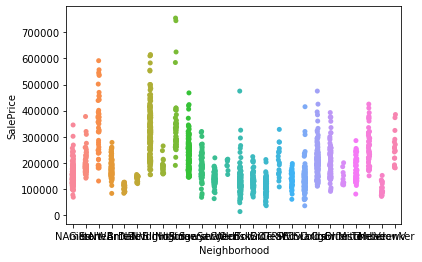

In [47]:
ax = sns.stripplot(x=clean_df['Neighborhood'], y=clean_df['SalePrice'], data=clean_df, jitter=0.05)